<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/chatgpt_stock_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please use PYTHON to grab Apple stock data and make it into a PANDAS DATAFRAME, where the column contains OPEN HIGH LOW CLOSE VOLUME


In [1]:
import yfinance as yf
import pandas as pd

# Specify the stock ticker symbol and date range
symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2022-02-14"

# Use yfinance to get the stock data
data = yf.download(symbol, start=start_date, end=end_date)

# Extract the columns we're interested in
data = data[["Open", "High", "Low", "Close", "Volume"]]

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Print the DataFrame to the console
print(df)



[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close     Volume
Date                                                                 
2010-01-04    7.622500    7.660714    7.585000    7.643214  493729600
2010-01-05    7.664286    7.699643    7.616071    7.656429  601904800
2010-01-06    7.656429    7.686786    7.526786    7.534643  552160000
2010-01-07    7.562500    7.571429    7.466071    7.520714  477131200
2010-01-08    7.510714    7.571429    7.466429    7.570714  447610800
...                ...         ...         ...         ...        ...
2022-02-07  172.860001  173.949997  170.949997  171.660004   77251200
2022-02-08  171.729996  175.350006  171.429993  174.830002   74829200
2022-02-09  176.050003  176.649994  174.899994  176.279999   71285000
2022-02-10  174.139999  175.479996  171.550003  172.119995   90865900
2022-02-11  172.330002  173.080002  168.039993  168.639999   98670700

[3050 rows x 5 colum

In [25]:
import numpy as np

def triple_barrier(price, lower_bound, upper_bound, max_period):
    """
    Applies the Triple Barrier method to a series of prices.
    
    Parameters:
    - price: a numpy array representing the stock price over time.
    - lower_bound: a float representing the stop loss price.
    - upper_bound: a float representing the take profit price.
    - max_period: an integer representing the maximum holding time.
    
    Returns:
    - A numpy array of the same shape as price, where each element is one of (-1, 0, 1),
      representing the signal to sell, hold, or buy the stock at that time.
    """
    # Initialize the output signal array with zeros
    signal = np.zeros_like(price)
    
    for i in range(1,len(price),1):
      returns = price[i:i+max_period]/price[i-1]
        
      # Find the first day where the price hits either the lower or upper barrier
      hit_lower = np.any(returns <= lower_bound)
      hit_upper = np.any(returns >= upper_bound)
      if (hit_lower == False) and (hit_upper == False):
        # If both barriers are hit, sell the stock
        signal[i] = 0
      elif hit_lower:
        # If only the lower barrier is hit, do nothing (hold)
        signal[i] = -1
      elif hit_upper:
        # If only the upper barrier is hit, buy the stock
        signal[i] = 1
    
    return signal


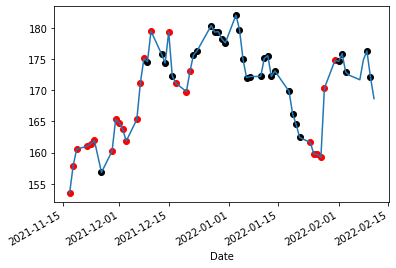

In [50]:
import matplotlib.pyplot as plt
n = 60
df['triple_barrier_signal'] = triple_barrier(df['Close'],0.97,1.03,20)
d = df.tail(n)
buy = d[d['triple_barrier_signal']==1]['Close']
sell = d[d['triple_barrier_signal']==-1]['Close']
d['Close'][-n:].plot()
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
plt.show()

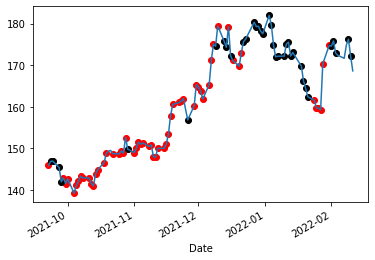